<a href="https://colab.research.google.com/github/Vishalch118/MobileNet-V2-Image-Classification/blob/main/MobileNest_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 #Configures path for kaggle.json file

In [ ]:
!kaggle datasets list | head


ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset        16151  2025-10-01 16:35:53.273000          17478        602  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                 47583  2025-10-03 09:21:58.590000          14566        351  1.0              
umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr  E-Commerce Customer Behavior & Sales Analysis -TR       138245  2025-10-29 13:58:22.810000           1575         35  1.0              


Dog vs Cat Dataset from kaggle

In [ ]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 94% 767M/812M [00:04<00:00, 104MB/s] 
100% 812M/812M [00:04<00:00, 202MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extractiong compressed files
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset successfullly extracted")

Dataset successfullly extracted


In [ ]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Dataset successfullly extracted")

Dataset successfullly extracted


In [ ]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of Images in dataset : ',file_count)

Number of Images in dataset :  25000


Names of Images

In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.7424.jpg', 'dog.4207.jpg', 'dog.4690.jpg', 'dog.11202.jpg', 'dog.7552.jpg', 'cat.8349.jpg', 'cat.11094.jpg', 'dog.8312.jpg', 'cat.11032.jpg', 'dog.5411.jpg', 'dog.325.jpg', 'cat.8289.jpg', 'dog.2126.jpg', 'dog.1631.jpg', 'cat.8083.jpg', 'cat.8064.jpg', 'cat.9796.jpg', 'cat.4418.jpg', 'cat.5319.jpg', 'dog.4700.jpg', 'dog.5647.jpg', 'dog.10584.jpg', 'cat.1005.jpg', 'dog.8352.jpg', 'cat.11954.jpg', 'dog.4214.jpg', 'cat.7798.jpg', 'cat.11574.jpg', 'cat.1509.jpg', 'cat.7362.jpg', 'dog.1016.jpg', 'cat.6497.jpg', 'dog.1459.jpg', 'cat.7904.jpg', 'cat.10592.jpg', 'cat.9614.jpg', 'dog.5601.jpg', 'dog.2388.jpg', 'cat.7266.jpg', 'dog.11697.jpg', 'cat.7149.jpg', 'cat.5125.jpg', 'cat.11990.jpg', 'dog.10656.jpg', 'dog.4019.jpg', 'dog.11875.jpg', 'cat.4502.jpg', 'dog.8655.jpg', 'dog.4424.jpg', 'dog.4393.jpg', 'dog.4072.jpg', 'dog.1567.jpg', 'dog.2558.jpg', 'cat.234.jpg', 'dog.4532.jpg', 'cat.10999.jpg', 'cat.9440.jpg', 'cat.10964.jpg', 'dog.1149.jpg', 'cat.5279.jpg', 'cat.7813.jpg', 'dog.7367.jp

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

AxesImage(shape=(286, 430, 3))


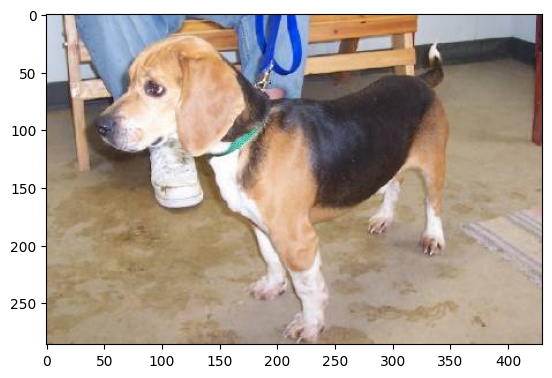

In [ ]:
#Dog Images
img=mpimg.imread('/content/train/dog.950.jpg')
imgplot=plt.imshow(img)
print(imgplot)

AxesImage(shape=(334, 377, 3))


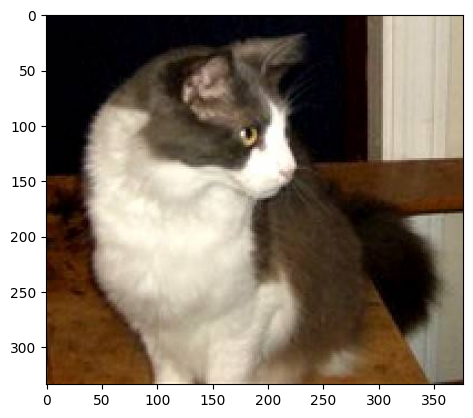

In [30]:
#Cat Images

img=mpimg.imread('/content/train/cat.1509.jpg')
imgplot=plt.imshow(img)
print(imgplot)

In [ ]:
file_names=os.listdir('/content/train')
dc=0
cc=0
for i in file_names:
  name=i[0:3]
  if name=='dog':
    dc+=1
  else:
    cc+=1
print("No.of Dog images: ",dc)
print("No.of Cat images: ",cc)



No.of Dog images:  12500
No.of Cat images:  12500


In [ ]:
#Resizing all images to 224x224px so they are compatible with MobileNet V2 model

 #Folder for resized images

os.mkdir('/content/Resized_Images')

In [ ]:
original_folder='/content/train/'
resized_folder='/content/Resized_Images/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  new_img_path=resized_folder+filename
  img.save(new_img_path)


In [ ]:
file_names=os.listdir('/content/Resized_Images')
dc=0
cc=0
for i in file_names:
  name=i[0:3]
  if name=='dog':
    dc+=1
  else:
    cc+=1
print("No.of Dog images: ",dc)
print("No.of Cat images: ",cc)

No.of Dog images:  998
No.of Cat images:  1002


Since No of images of Cats abd Dogs are almost equal , This is a good dataset to Train the MobileNest V2 model.

In [ ]:
file_names=os.listdir('/content/Resized_Images')
print(file_names)

['cat.7424.jpg', 'dog.4207.jpg', 'dog.4690.jpg', 'dog.11202.jpg', 'dog.7552.jpg', 'cat.8349.jpg', 'cat.11094.jpg', 'dog.8312.jpg', 'cat.11032.jpg', 'dog.5411.jpg', 'dog.325.jpg', 'cat.8289.jpg', 'dog.2126.jpg', 'dog.1631.jpg', 'cat.8083.jpg', 'cat.8064.jpg', 'cat.9796.jpg', 'cat.4418.jpg', 'cat.5319.jpg', 'dog.4700.jpg', 'dog.5647.jpg', 'dog.10584.jpg', 'cat.1005.jpg', 'dog.8352.jpg', 'cat.11954.jpg', 'dog.4214.jpg', 'cat.7798.jpg', 'cat.11574.jpg', 'cat.1509.jpg', 'cat.7362.jpg', 'dog.1016.jpg', 'cat.6497.jpg', 'dog.1459.jpg', 'cat.7904.jpg', 'cat.10592.jpg', 'cat.9614.jpg', 'dog.5601.jpg', 'dog.2388.jpg', 'cat.7266.jpg', 'dog.11697.jpg', 'cat.7149.jpg', 'cat.5125.jpg', 'cat.11990.jpg', 'dog.10656.jpg', 'dog.4019.jpg', 'dog.11875.jpg', 'cat.4502.jpg', 'dog.8655.jpg', 'dog.4424.jpg', 'dog.4393.jpg', 'dog.4072.jpg', 'dog.1567.jpg', 'dog.2558.jpg', 'cat.234.jpg', 'dog.4532.jpg', 'cat.10999.jpg', 'cat.9440.jpg', 'cat.10964.jpg', 'dog.1149.jpg', 'cat.5279.jpg', 'cat.7813.jpg', 'dog.7367.jp

AxesImage(shape=(224, 224, 3))


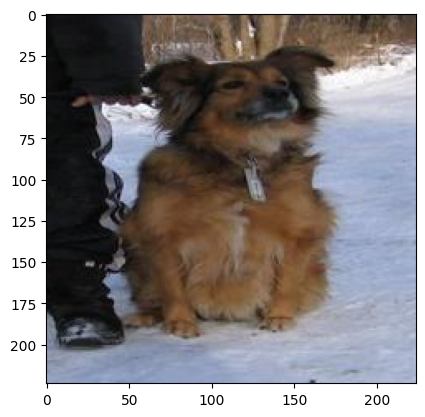

In [ ]:
#Dog Images Re-sized
img=mpimg.imread('/content/Resized_Images/dog.4207.jpg')
imgplot=plt.imshow(img)
print(imgplot)

AxesImage(shape=(224, 224, 3))


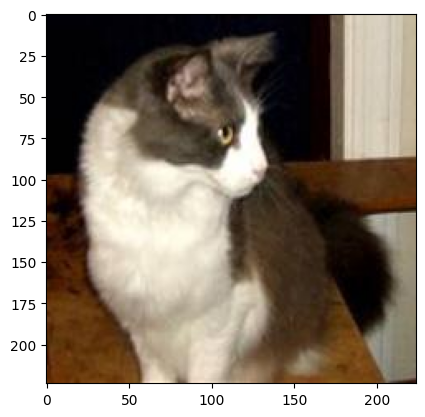

In [29]:
#Cat Images Re-sized
img=mpimg.imread('/content/Resized_Images/cat.1509.jpg')
imgplot=plt.imshow(img)
print(imgplot)

The size of the Image is 224 X 224 px

Labelling all images
Cat = 0
Dog = 1

In [33]:
labels=[]
file_names=os.listdir('/content/Resized_Images/')
for i in range(2000):
  file_name=file_names[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [37]:
print(file_names[0:10])
print(labels[0:10])

['cat.7424.jpg', 'dog.4207.jpg', 'dog.4690.jpg', 'dog.11202.jpg', 'dog.7552.jpg', 'cat.8349.jpg', 'cat.11094.jpg', 'dog.8312.jpg', 'cat.11032.jpg', 'dog.5411.jpg']
[0, 1, 1, 1, 1, 0, 0, 1, 0, 1]


Converting Resized Images to Numpy arrays because model understands numbers

In [45]:
import cv2
import glob

In [53]:
image_directory = '/content/Resized_Images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [54]:
print(dog_cat_images)

[[[[124  82 255]
   [121  81 255]
   [120  80 255]
   ...
   [ 83 109 116]
   [ 80 106 112]
   [ 87 116 121]]

  [[125  83 255]
   [122  83 255]
   [119  81 255]
   ...
   [ 76 102 109]
   [ 74 100 106]
   [ 80 109 114]]

  [[124  87 255]
   [122  85 255]
   [118  82 252]
   ...
   [ 77 103 110]
   [ 78 104 111]
   [ 81 109 116]]

  ...

  [[ 22  30  47]
   [ 21  29  46]
   [ 20  27  46]
   ...
   [  2  11  15]
   [  3  12  16]
   [  2  11  15]]

  [[ 24  32  49]
   [ 22  30  47]
   [ 20  27  46]
   ...
   [  3  12  16]
   [  4  13  17]
   [  5  14  18]]

  [[ 26  34  51]
   [ 24  32  49]
   [ 22  29  48]
   ...
   [  3  12  16]
   [  5  14  18]
   [  8  17  21]]]


 [[[ 12  10  10]
   [ 13  11  11]
   [ 15  13  13]
   ...
   [ 46  55  68]
   [ 47  56  69]
   [ 49  58  71]]

  [[ 12  10  10]
   [ 13  11  11]
   [ 15  13  13]
   ...
   [ 51  60  73]
   [ 51  60  73]
   [ 52  61  74]]

  [[ 12  10  10]
   [ 13  11  11]
   [ 15  13  13]
   ...
   [ 56  65  78]
   [ 57  66  79]
   [ 57  66

In [55]:
type(dog_cat_images)

numpy.ndarray

In [56]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


2000 images with 224 X 224 size RGB Images

In [57]:
X=dog_cat_images
Y=np.asarray(labels)

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#test_size=0.2 represents 20% of images are testing data and the remaining 80% are training data
#Training images are stored in X_train labels in Y_train
#Testing images in X_test and labels in Y_test

In [59]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [60]:
#Scaling data (Converting pixel values from the scale of 0 -> 255
#To a scale of 0 -> 1)

X_train_scaled=X_train/255
X_test_scaled=X_test/255
print(X_train_scaled)

[[[[0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   ...
   [0.54509804 0.49411765 0.48627451]
   [0.44313725 0.39215686 0.38431373]
   [0.29803922 0.24705882 0.23921569]]

  [[0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   ...
   [0.47843137 0.42745098 0.41960784]
   [0.42352941 0.37254902 0.36470588]
   [0.32156863 0.27058824 0.2627451 ]]

  [[0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   [0.89411765 0.91372549 0.90980392]
   ...
   [0.41176471 0.36470588 0.36470588]
   [0.39607843 0.34901961 0.34901961]
   [0.33333333 0.28627451 0.28627451]]

  ...

  [[0.89803922 0.90588235 0.90588235]
   [0.90196078 0.90980392 0.90980392]
   [0.91372549 0.92156863 0.92156863]
   ...
   [0.86666667 0.86666667 0.86666667]
   [0.87058824 0.87058824 0.87058824]
   [0.87058824 0.87058824 0.87058824]]

  [[0.90980392 0.91764706 0.91764706]
   [0.9

In [85]:
import tensorflow as tf

mobilenet_path = tf.keras.utils.get_file(
    "mobilenet_v2_feature_vector_4",
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4?tf-hub-format=compressed",
    untar=True
)

mobilenet_model = tf.saved_model.load(mobilenet_path)

# The object is directly callable (no 'signatures' dict)
def mobilenet_fn(x):
    return mobilenet_model(x)  # directly call

class MobileNetFeatureLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        outputs = mobilenet_fn(tf.cast(inputs, tf.float32))
        return outputs

inputs = tf.keras.Input(shape=(224, 224, 3))
x = MobileNetFeatureLayer()(inputs)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobile_net_feature_layer_2      │ (None, 1280)           │             0 │
│ (MobileNetFeatureLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['acc']
)


In [88]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.8945 - loss: 0.2904
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 47s 926ms/step - acc: 0.9760 - loss: 0.0642
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 913ms/step - acc: 0.9772 - loss: 0.0605
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 875ms/step - acc: 0.9893 - loss: 0.0364
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 44s 876ms/step - acc: 0.9946 - loss: 0.0285


In [90]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 877ms/step - acc: 0.9884 - loss: 0.0667
Test Loss = 0.07768653333187103
Test Accuracy = 0.9775000214576721


Predictive System

Path of the image to be predicted: /content/cat.jpg


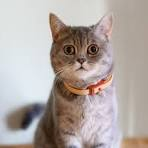

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[0.9989392  0.00106083]]
0
The image represents a Cat


In [94]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


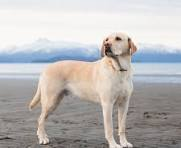

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.00180523 0.99819475]]
1
The image represents a Dog


In [95]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')